In [1]:
import pandas as pd
import numpy as np

In [2]:
#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.min_rows', 100)
#pd.set_option('display.expand_frame_repr', True)

In [3]:
pd.get_option("display.max_rows")

60

### Results Expected
1. Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
2. Present the overall approach of the analysis in a presentation: 
3. Mention the problem statement and the analysis approach briefly 
4. Explain the results of univariate, bivariate analysis etc. in business terms
5. Include visualisations and summarise the most important results in the presentation
 

6. You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 


> Important Note: Please make sure to rename your Python notebook "Group_Facilitator_Name.ipynb". 

 

* You need to submit a GitHub repository link that contains the files above . You need to write a README.md for the GitHub repository.  You can follow the video below to understand how to create the GitHub repository. Make sure your GitHub link is public. 

### Load data

In [4]:
df = pd.read_csv("loan.csv", dtype={"next_pymnt_d": "string"})

In [5]:
df_loan = df # Caching original df 

* Getting a sense of the amount of data we are dealing with.
* How much is already clean, how much of it is already numeric. 
* If not, can something be made numeric?
* Look at the distribution of all the numeric data first.

In [6]:
(nNoOfRows, nNoOfCols) = df.shape # rows: 39717, cols: 111
nDfShape = (nNoOfRows, nNoOfCols)

In [7]:
nDfShape

(39717, 111)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(23), string(1)
memory usage: 33.6+ MB


### Get the lone string type column

In [9]:
df_string = df.select_dtypes(include="string")

In [10]:
df_string.next_pymnt_d.value_counts()

Jun-16    1125
Jul-16      15
Name: next_pymnt_d, dtype: Int64

### Way too many nulls in this column

In [11]:
nNumberOfNulls = df_string.isna().sum()

### Obtain percentage of missing data

In [12]:
nPctMissingData = 100 * nNumberOfNulls/nNoOfRows

In [13]:
nPctPresent = 100 - nPctMissingData

In [14]:
print(nPctMissingData) 
print(nPctPresent)

next_pymnt_d    97.129693
dtype: float64
next_pymnt_d    2.870307
dtype: float64


1. It makes sense to drop this column as not much information will be obtained from this. There are 1125 "Jun-16" entries and 15 "Jul-16" entries. 


2. The model will not learn anything from this. Add it back if something can be obtained from the data in the future


In [15]:
df.drop("next_pymnt_d", axis=1, inplace=True)

* shape must be 39717, (111-1)

In [16]:
df.shape

(39717, 110)

### Get all the object type of data

In [17]:
df_object = df.select_dtypes(include="object")

In [18]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   term                 39717 non-null  object
 1   int_rate             39717 non-null  object
 2   grade                39717 non-null  object
 3   sub_grade            39717 non-null  object
 4   emp_title            37258 non-null  object
 5   emp_length           38642 non-null  object
 6   home_ownership       39717 non-null  object
 7   verification_status  39717 non-null  object
 8   issue_d              39717 non-null  object
 9   loan_status          39717 non-null  object
 10  pymnt_plan           39717 non-null  object
 11  url                  39717 non-null  object
 12  desc                 26777 non-null  object
 13  purpose              39717 non-null  object
 14  title                39706 non-null  object
 15  zip_code             39717 non-null  object
 16  addr

## Going to look at each column one at a time, starting with "term"

In [19]:
df.term.value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

### Can remove the redundant " months" and convert this column to numeric(int). 
> Seems like this company only gives out loans in to flavors: 3 years and 5 years

In [20]:
df.term = df.term.str.replace(" months","")

In [21]:
df.term.value_counts()

 36    29096
 60    10621
Name: term, dtype: int64

In [22]:
df.term = df.term.astype(int)

In [23]:
df["termYrs"] = df["term"]/12

In [24]:
"termYrs" in df.columns

True

In [25]:
df.drop("term", axis=1, inplace=True)

In [26]:
"term" in df.columns

False

In [27]:
df_object = df.select_dtypes(include="object")

In [28]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   int_rate             39717 non-null  object
 1   grade                39717 non-null  object
 2   sub_grade            39717 non-null  object
 3   emp_title            37258 non-null  object
 4   emp_length           38642 non-null  object
 5   home_ownership       39717 non-null  object
 6   verification_status  39717 non-null  object
 7   issue_d              39717 non-null  object
 8   loan_status          39717 non-null  object
 9   pymnt_plan           39717 non-null  object
 10  url                  39717 non-null  object
 11  desc                 26777 non-null  object
 12  purpose              39717 non-null  object
 13  title                39706 non-null  object
 14  zip_code             39717 non-null  object
 15  addr_state           39717 non-null  object
 16  earl

### int_rate column

In [29]:
df.int_rate.describe() # A lot of repetition

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [30]:
df.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

### Just need to get rid of the "%"

In [31]:
df.int_rate = df.int_rate.str.replace("%","")

In [32]:
df.int_rate = df.int_rate.astype(float)

### Tackling next column

In [33]:
df_object = df.select_dtypes(include="object")

In [34]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   grade                39717 non-null  object
 1   sub_grade            39717 non-null  object
 2   emp_title            37258 non-null  object
 3   emp_length           38642 non-null  object
 4   home_ownership       39717 non-null  object
 5   verification_status  39717 non-null  object
 6   issue_d              39717 non-null  object
 7   loan_status          39717 non-null  object
 8   pymnt_plan           39717 non-null  object
 9   url                  39717 non-null  object
 10  desc                 26777 non-null  object
 11  purpose              39717 non-null  object
 12  title                39706 non-null  object
 13  zip_code             39717 non-null  object
 14  addr_state           39717 non-null  object
 15  earliest_cr_line     39717 non-null  object
 16  revo

In [35]:
df.grade.describe()

count     39717
unique        7
top           B
freq      12020
Name: grade, dtype: object

In [36]:
df.grade = df.grade.astype("string")

### Tackling next column

In [37]:
df_object = df.select_dtypes(include="object")

### sub_grade

In [38]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sub_grade            39717 non-null  object
 1   emp_title            37258 non-null  object
 2   emp_length           38642 non-null  object
 3   home_ownership       39717 non-null  object
 4   verification_status  39717 non-null  object
 5   issue_d              39717 non-null  object
 6   loan_status          39717 non-null  object
 7   pymnt_plan           39717 non-null  object
 8   url                  39717 non-null  object
 9   desc                 26777 non-null  object
 10  purpose              39717 non-null  object
 11  title                39706 non-null  object
 12  zip_code             39717 non-null  object
 13  addr_state           39717 non-null  object
 14  earliest_cr_line     39717 non-null  object
 15  revol_util           39667 non-null  object
 16  init

In [39]:
df.sub_grade.describe()

count     39717
unique       35
top          B3
freq       2917
Name: sub_grade, dtype: object

* sub_grade will be a further breakup within a grade. I think it goes from 1 to 5

In [40]:
df.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

In [41]:
df.sub_grade = df.sub_grade.astype("string")

In [42]:
df_check = df[df.grade=="B"]["sub_grade"]

* It does go from 1 to 5

In [43]:
df_check.value_counts() 

B3    2917
B5    2704
B4    2512
B2    2057
B1    1830
Name: sub_grade, dtype: Int64

In [44]:
df_object = df.select_dtypes(include="object")

In [45]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emp_title            37258 non-null  object
 1   emp_length           38642 non-null  object
 2   home_ownership       39717 non-null  object
 3   verification_status  39717 non-null  object
 4   issue_d              39717 non-null  object
 5   loan_status          39717 non-null  object
 6   pymnt_plan           39717 non-null  object
 7   url                  39717 non-null  object
 8   desc                 26777 non-null  object
 9   purpose              39717 non-null  object
 10  title                39706 non-null  object
 11  zip_code             39717 non-null  object
 12  addr_state           39717 non-null  object
 13  earliest_cr_line     39717 non-null  object
 14  revol_util           39667 non-null  object
 15  initial_list_status  39717 non-null  object
 16  last

### emp_title and emp_length have null values.
> Will tackle emp_title later. 
> Gonna look at emp_length now

In [46]:
df.emp_length.isna().sum()

1075

In [47]:
df.emp_title.isna().sum()

2459

### emp_length has both "years" and "year" 

In [48]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [49]:
df.emp_length = df.emp_length.str.replace("years", "")

In [50]:
df.emp_length = df.emp_length.str.replace("year", "")

In [51]:
df.emp_length = df.emp_length.str.replace(" s","")

In [52]:
df.emp_length.value_counts()

10+     8879
< 1     4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
Name: emp_length, dtype: int64

### I think it safe to make this column categorical.
> May be length: 0-2, 2-4, 4-6, 6-8, 8-10, 10+

In [53]:
df["emp_length2"] = df["emp_length"].str.replace("< 1","0")

In [54]:
df.emp_length2.value_counts()

10+     8879
0       4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
Name: emp_length2, dtype: int64

In [55]:
df.emp_length2.isna().sum()

1075

### home_ownership

In [56]:
df.home_ownership.isna().sum()

0

In [57]:
df.home_ownership.describe()

count     39717
unique        5
top        RENT
freq      18899
Name: home_ownership, dtype: object

In [58]:
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [59]:
df.home_ownership = df.home_ownership.astype("string")

### verification_status

In [60]:
df.verification_status.describe()

count            39717
unique               3
top       Not Verified
freq             16921
Name: verification_status, dtype: object

In [61]:
df.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [62]:
df.verification_status.isna().sum()

0

In [63]:
df.home_ownership = df.home_ownership.astype("string")

#### issue_d

In [64]:
df.issue_d.value_counts()

Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [65]:
df.issue_d = df.issue_d.astype("string")

### loan_status

In [66]:
df.loan_status = df.loan_status.astype("string")

In [67]:
df.loan_status.isna().sum()

0

#### pymnt_plan

In [68]:
df.pymnt_plan.isna().sum()

0

In [69]:
df.pymnt_plan.value_counts()

n    39717
Name: pymnt_plan, dtype: int64

### Just one value for payment plan --> Drop it

In [70]:
df.drop("pymnt_plan", axis=1, inplace=True)

#### url

In [71]:
df.url.isna().sum()

0

In [72]:
df.url.describe()

count                                                 39717
unique                                                39717
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object

1. There are 39717 unique entries. Makes sense because each application will have its own url.
2. Look at one url to see what information we get

In [73]:
df.url[0]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'

#### We just get the loan_id(=1077501 for the first row) for each applicant. We already have this id in the 'id' column

In [74]:
df.id[0]

1077501

### Drop url column as it is redundant

In [75]:
df.drop("url", axis=1, inplace=True)

#### desc column. 
> Seems to have comments on why the loan is taken. Something can be obtained from it, but each applicant can put a unique string as the reason. Not sure if keeping this has any use

In [76]:
# df.drop("desc", axis=1, inplace=True)

### purpose column seems to be categorical. So we can convert it to string

In [77]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: int64

In [78]:
df.purpose = df.purpose.astype("string")

### title is the title provided by borrower. We already have that in purpose. Drop it and/or study correlation with purpose

### zip_code

In [79]:
df.zip_code.isna().sum()

0

In [80]:
df.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64

### Analysis can be done based on zip code, for sure. 
1. Are people from a certain zip code/area more susceptible to defaults?
2. Seems like 100xx series has more loan applications. How much did they default, etc?

In [81]:
df.zip_code = df.zip_code.astype("string")

### addr_state

In [82]:
df.addr_state.isna().sum()

0

In [83]:
df.addr_state.value_counts()

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

### Convert this to string. We can analyze on per-state basis

In [84]:
df.addr_state = df.addr_state.astype("string")

### revol_util

In [85]:
df.revol_util.isna().sum()

50

### Has a "%" after the number

In [86]:
df.revol_util.describe()

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object

In [87]:
df.revol_util = df.revol_util.str.replace("%","")

In [88]:
df.revol_util = df.revol_util.astype(float)

#### Earliest_cr_line

In [89]:
df.earliest_cr_line.isna().sum()

0

In [90]:
df.earliest_cr_line.value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [91]:
df.earliest_cr_line = df.earliest_cr_line.astype("string")

### initial_list_status

In [92]:
df.initial_list_status.value_counts()

f    39717
Name: initial_list_status, dtype: int64

* all values of initial_list_status are f. No point in keeping it

In [93]:
df.drop("initial_list_status", axis=1, inplace=True)

In [94]:
df.last_pymnt_d.describe()

count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object

### last_pymnt_d

In [95]:
df.last_pymnt_d = df.last_pymnt_d.astype("string")

### last_credit_pull_d

In [96]:
df.last_credit_pull_d.value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
          ...  
May-08        1
Jun-08        1
Jul-08        1
May-07        1
Jul-07        1
Name: last_credit_pull_d, Length: 106, dtype: int64

In [97]:
df.last_credit_pull_d = df.last_credit_pull_d.astype("string")

### application_type

In [98]:
df.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

### No point in keepin this as all rows have the same value

In [99]:
df.drop("application_type", axis=1, inplace=True)

In [100]:
df_object = df.select_dtypes(include="object")

In [101]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emp_title            37258 non-null  object
 1   emp_length           38642 non-null  object
 2   verification_status  39717 non-null  object
 3   desc                 26777 non-null  object
 4   title                39706 non-null  object
 5   emp_length2          38642 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [102]:
df.drop("emp_length", axis=1, inplace=True)

In [103]:
df_object = df.select_dtypes(include="object")

In [104]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emp_title            37258 non-null  object
 1   verification_status  39717 non-null  object
 2   desc                 26777 non-null  object
 3   title                39706 non-null  object
 4   emp_length2          38642 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


### desc can be dropped, I think
> They are just comments entered by the borrower. How can that be used as a feature. Each answer can be unique
### verification_status is nice. 
> Has three categories. 
> But has quite a few nas()
### emp_title is not that good.
> Has a lot of clients, and has a lot of nas()
### title seems to be redundant. 
> purpose already covers the loan category perfectly.
### emp_length is nice
> Has the number of years of experience listed. Can be split into bins of like 0-2, 2-4, 6-8, 8-10, 10+ or something

In [105]:
df.rename(columns = {'emp_length2 ':'emp_length'}, inplace = True)

In [106]:
df_object = df.select_dtypes(include="object")

In [107]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emp_title            37258 non-null  object
 1   verification_status  39717 non-null  object
 2   desc                 26777 non-null  object
 3   title                39706 non-null  object
 4   emp_length2          38642 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [108]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: Int64

In [109]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: Int64

In [110]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emp_title            37258 non-null  object
 1   verification_status  39717 non-null  object
 2   desc                 26777 non-null  object
 3   title                39706 non-null  object
 4   emp_length2          38642 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [111]:
df_object.rename(columns={"emp_length2": "emp_length"}, inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [112]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emp_title            37258 non-null  object
 1   verification_status  39717 non-null  object
 2   desc                 26777 non-null  object
 3   title                39706 non-null  object
 4   emp_length           38642 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [113]:
df.emp_length2.value_counts()

10+     8879
0       4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
Name: emp_length2, dtype: int64

In [114]:
df_string = df.select_dtypes(include="string")

In [115]:
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   grade               39717 non-null  string
 1   sub_grade           39717 non-null  string
 2   home_ownership      39717 non-null  string
 3   issue_d             39717 non-null  string
 4   loan_status         39717 non-null  string
 5   purpose             39717 non-null  string
 6   zip_code            39717 non-null  string
 7   addr_state          39717 non-null  string
 8   earliest_cr_line    39717 non-null  string
 9   last_pymnt_d        39646 non-null  string
 10  last_credit_pull_d  39715 non-null  string
dtypes: string(11)
memory usage: 3.3 MB


In [116]:
df_numeric = df.select_dtypes(exclude=["string", "object"])

In [117]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 90 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   int_rate                        39717 non-null  float64
 6   installment                     39717 non-null  float64
 7   annual_inc                      39717 non-null  float64
 8   dti                             39717 non-null  float64
 9   delinq_2yrs                     39717 non-null  int64  
 10  inq_last_6mths                  39717 non-null  int64  
 11  mths_since_last_delinq          14035 non-null  float64
 12  mths_since_last_record          

In [118]:
df.member_id.value_counts()

1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64

In [119]:
df.drop(["id", "member_id"], axis=1, inplace=True)

In [120]:
df_numeric = df.select_dtypes(exclude=["string","object"])

In [121]:
df_numeric.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
                              ...  
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
termYrs                           0
Length: 88, dtype: int64

### Drop all columns with all nans

In [122]:
df.dropna(axis=1, how='all', inplace=True)

In [123]:
df_numeric = df.select_dtypes(exclude=["string","object"])

In [124]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   int_rate                    39717 non-null  float64
 4   installment                 39717 non-null  float64
 5   annual_inc                  39717 non-null  float64
 6   dti                         39717 non-null  float64
 7   delinq_2yrs                 39717 non-null  int64  
 8   inq_last_6mths              39717 non-null  int64  
 9   mths_since_last_delinq      14035 non-null  float64
 10  mths_since_last_record      2786 non-null   float64
 11  open_acc                    39717 non-null  int64  
 12  pub_rec                     39717 non-null  int64  
 13  revol_bal                   397

In [125]:
df_numeric.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq        25682
mths_since_last_record        36931
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med       56
policy_code                 

* Targetting mths_since_last_delinq and mths_since_last_record

In [126]:
df_numeric.mths_since_last_delinq.isna().sum()

25682

In [127]:
df_numeric.mths_since_last_record.isna().sum()/nNoOfRows

0.9298537150338646

In [128]:
df.drop("mths_since_last_record", axis=1, inplace=True)

In [129]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [130]:
df_numeric = df.select_dtypes(exclude=["string","object"])

In [131]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### pub_rec_bankruptcies
> I think it makes sense to fill the unknown values with 0. i.e. no public record of bankruptcies

In [132]:
df["pub_rec_bankruptcies"].fillna(0, inplace = True)

In [133]:
df.pub_rec_bankruptcies.value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [134]:
df.pub_rec_bankruptcies.isna().sum()

0

In [135]:
df_numeric = df.select_dtypes(exclude=["string","object"])

In [136]:
df_numeric.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq        25682
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med       56
policy_code                       0
acc_now_delinq              

In [137]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                   

In [138]:
df.desc.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                                                                                                                                                                                                                                                                                                    

In [139]:
df.drop("desc", axis=1, inplace=True)

In [140]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                   

In [141]:
df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [142]:
df.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq        25682
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       50
total_acc                         0
out_prncp                   

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   int_rate                    39717 non-null  float64
 4   installment                 39717 non-null  float64
 5   grade                       39717 non-null  string 
 6   sub_grade                   39717 non-null  string 
 7   emp_title                   37258 non-null  object 
 8   home_ownership              39717 non-null  string 
 9   annual_inc                  39717 non-null  float64
 10  verification_status         39717 non-null  object 
 11  issue_d                     39717 non-null  string 
 12  loan_status                 39717 non-null  string 
 13  purpose                     397

### Does it make sense to fillna of mths_since_last_delinq with 0. I think it kinda does?
> Will come back to this later


### Looking at numeric and writing some notes that I can come back to later

1. loan_amnt: I think this can be binned
2. funded_amnt and funded_amnt_inv : Might be highly correlated. I need to know what they mean. Will ask someone. Can also be binned? Probably?
3. int_rate: There are some outliers. 78 of them. Some sort of univariate analysis can be done for sure
4. installment: monthly payment once loan originates
5. annual_inc: Binning
6. dti: Not sure how to deal with this
7. delinq_2yrs: Seems to be clean and can reveal a lot of insights. It is the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. Not paying the EMI. Past due
8. inq_last_6mths: Number of inquiries of credit report.. Hmm..Curious. If one asks more, does that he is careful? or are they about to default? Or does it have no correlation whatsoever.
9. mths_since_last_delinq: This one has like 65% null values. Can I fill it with zeros?
10. open_acc(credit_line): Need to ask what the hell this means. How many loans has the borrower taken
11. pub_rec: Number of derogatory public records. There are ~37k entries with 0 derogatory public records. And some with 1, 2. Can help determine if person will defect in the future.
12. revol_bal and revol_util: Need to ASK. Revolving line: Loan asked, payed it and then company gives the same loan again. Money usage. If loan is 5 lakh, he used 1 lakh : rate: 20%
13. total_acc: must have a correlation with open_acc.
14. out_prncp and out_prncp_inv: Will help to see how remaining principle affects defect status
15. total_pymnt and total_pymnt_inv: total payments Rx to date for total amount funded 
16. Remaning total_* params
17. tax_liens: Drop this column. It has ~all rows with 0 value.
18. Quasi Constant variables: Picked 6-7 features which stayed relatively constant. Can have a look at this too.
['collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']
 > Out of the above list,  drop everything but "pub_rec_bankruptcies" : )
19. collection_recovery_fee: Post charge off fee. This is not going to determine if loan status will be charged off, fully paid, etc., right? This is not something that is agreed upon at the time of giving a loan, right? This is something after the fact, I believe.
 

In [144]:
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

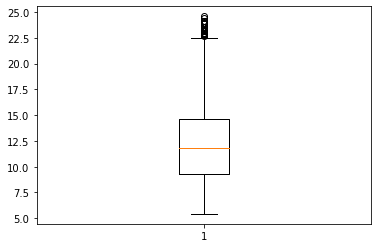

In [146]:
plt.boxplot(df.int_rate)
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


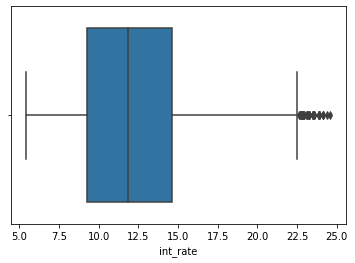

In [147]:
sns.boxplot(df.int_rate)
plt.show()

In [148]:
df.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [149]:
IQR = 14.59 - 9.25

In [150]:
nUpperLimit = 1.5 * IQR + 14.59
nLowerLimit = 9.25 -1.5 * IQR 

In [151]:
len(df[(df.int_rate > nUpperLimit)])

78

In [152]:
df.installment.isna().sum()

0

In [153]:
df.annual_inc.value_counts()

60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: annual_inc, Length: 5318, dtype: int64

In [154]:
df.delinq_2yrs.value_counts()

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [155]:
df.pub_rec.value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

In [156]:
df.tax_liens.value_counts()

0.0    39678
Name: tax_liens, dtype: int64

In [157]:
df.drop("tax_liens", axis=1, inplace=True)

In [158]:
from sklearn.feature_selection import VarianceThreshold

In [159]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,termYrs,emp_length2
0,5000,5000,4975.0,10.65,162.87,B,B2,NaN,RENT,24000.0,...,171.62,May-16,0.0,1,0,0.0,0,0.0,3.0,10+
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,RENT,30000.0,...,119.66,Sep-13,0.0,1,0,0.0,0,0.0,5.0,0
2,2400,2400,2400.0,15.96,84.33,C,C5,NaN,RENT,12252.0,...,649.91,May-16,0.0,1,0,0.0,0,0.0,3.0,10+
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,RENT,49200.0,...,357.48,Apr-16,0.0,1,0,0.0,0,0.0,3.0,10+
4,3000,3000,3000.0,12.69,67.79,B,B5,University Medical Group,RENT,80000.0,...,67.79,May-16,0.0,1,0,0.0,0,0.0,5.0,1


#### Quasi-Constant variables

Let's drop quasi-constant features where 98% of the values are similar or constant. Check out [sklearn.feature_selection.VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) for a better understanding of the process followed below.

In [160]:
sel = VarianceThreshold(threshold=0.02)

sel.fit(df_numeric.iloc[:,:])


VarianceThreshold(threshold=0.02)

In [161]:
df_numeric.shape[1]

33

In [162]:
print(f"Number of retained features: {sum(sel.get_support())}")

Number of retained features: 27


In [163]:
quasi_constant_features_list = [x for x in df_numeric.iloc[:, :].columns if x not in df_numeric.iloc[:, :].columns[sel.get_support()]]

In [164]:
quasi_constant_features_list

['collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [165]:
sel2 = VarianceThreshold(threshold=0.05)

In [166]:
sel2.fit(df_numeric.iloc[:,:])

VarianceThreshold(threshold=0.05)

In [167]:
print(f"Number of retained features: {sum(sel2.get_support())}")

Number of retained features: 26


In [168]:
quasi_constant_features_list2 = [x for x in df_numeric.iloc[:, :].columns if x not in df_numeric.iloc[:, :].columns[sel2.get_support()]]

In [169]:
quasi_constant_features_list2

['collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [170]:
df.collection_recovery_fee.isna().sum()

0

In [171]:
df.collection_recovery_fee.value_counts()

0.0000      35935
2.0000         12
1.2000         10
3.7100          9
1.8800          8
            ...  
3.7900          1
773.4900        1
272.8250        1
1.7697          1
0.2300          1
Name: collection_recovery_fee, Length: 2616, dtype: int64

In [172]:
len(df[df.collection_recovery_fee == 0])

35935

In [173]:
df[df.collection_recovery_fee == 0]["loan_status"]

0        Fully Paid
2        Fully Paid
3        Fully Paid
4           Current
5        Fully Paid
            ...    
39712    Fully Paid
39713    Fully Paid
39714    Fully Paid
39715    Fully Paid
39716    Fully Paid
Name: loan_status, Length: 35935, dtype: string

In [174]:
df.drop("collection_recovery_fee", axis=1, inplace=True)

In [175]:
df.last_pymnt_amnt.value_counts()

0.00       74
276.06     21
200.00     17
50.00      16
100.00     15
           ..
1763.87     1
172.27      1
889.67      1
150.73      1
256.59      1
Name: last_pymnt_amnt, Length: 34930, dtype: int64

In [176]:
quasi_constant_features_list2

['collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens']

In [177]:
df.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [178]:
df.policy_code.isna().sum()

0

In [179]:
df.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [180]:
df.chargeoff_within_12_mths.value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [181]:
df.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

In [182]:
df.pub_rec_bankruptcies.value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [183]:
df.drop(['policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt'], axis=1, inplace=True)

In [184]:
df_numeric = df.select_dtypes(exclude=["string", object])

In [185]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   int_rate                    39717 non-null  float64
 4   installment                 39717 non-null  float64
 5   annual_inc                  39717 non-null  float64
 6   dti                         39717 non-null  float64
 7   delinq_2yrs                 39717 non-null  int64  
 8   inq_last_6mths              39717 non-null  int64  
 9   mths_since_last_delinq      14035 non-null  float64
 10  open_acc                    39717 non-null  int64  
 11  pub_rec                     39717 non-null  int64  
 12  revol_bal                   39717 non-null  int64  
 13  revol_util                  396

In [186]:
df.collections_12_mths_ex_med.isna().sum()

56

In [187]:
df.collections_12_mths_ex_med.value_counts()

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64

In [188]:
df.drop("collections_12_mths_ex_med", axis=1, inplace=True)

In [189]:
df.pub_rec_bankruptcies.value_counts()

0.0    38036
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [190]:
df_numeric = df.select_dtypes(exclude=["string", object])

In [191]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   int_rate                39717 non-null  float64
 4   installment             39717 non-null  float64
 5   annual_inc              39717 non-null  float64
 6   dti                     39717 non-null  float64
 7   delinq_2yrs             39717 non-null  int64  
 8   inq_last_6mths          39717 non-null  int64  
 9   mths_since_last_delinq  14035 non-null  float64
 10  open_acc                39717 non-null  int64  
 11  pub_rec                 39717 non-null  int64  
 12  revol_bal               39717 non-null  int64  
 13  revol_util              39667 non-null  float64
 14  total_acc               39717 non-null

In [192]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   emp_title            37258 non-null  object
 1   verification_status  39717 non-null  object
 2   desc                 26777 non-null  object
 3   title                39706 non-null  object
 4   emp_length           38642 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


### Would have to see how to tackle rows

In [193]:
df.isna().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

## mths_since_last_delinq

In [194]:
df.mths_since_last_delinq.isna().sum()/df.mths_since_last_delinq.shape[0]

0.6466248709620566

In [195]:
df[df.mths_since_last_delinq.isna()]["loan_status"].value_counts()

Fully Paid     21420
Charged Off     3485
Current          777
Name: loan_status, dtype: Int64

In [196]:
df.mths_since_last_delinq.value_counts()

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64

In [197]:
df.mths_since_last_delinq.mode()

0    0.0
dtype: float64

#### It won't make sense to fill the values up with something. Can't see any pattern that can be obtained between loan status and mths_since_last_delinq. Plus the distribution isn't that goo, mode() is not an option

In [198]:
df.drop("mths_since_last_delinq", axis=1, inplace=True)

In [199]:
len(df.columns)

40

#### I have 25 numeric features, 11 string and 4 object features.
Total = 40 left instead of 111
Only 36% columns used as essential features

In [200]:
df.select_dtypes(exclude=["object", "string"]).shape

(39717, 25)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   int_rate              39717 non-null  float64
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  string 
 6   sub_grade             39717 non-null  string 
 7   emp_title             37258 non-null  object 
 8   home_ownership        39717 non-null  string 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  string 
 12  loan_status           39717 non-null  string 
 13  purpose               39717 non-null  string 
 14  title                 39706 non-null  object 
 15  zip_code           

### Handling missing rows

In [202]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d  

In [203]:
2459/39717

0.06191303472064859

In [204]:
1075/39717

0.027066495455346576

In [205]:
df.title.mode()

0    Debt Consolidation
dtype: object

In [206]:
df.title.mode()[0]

'Debt Consolidation'

In [207]:
df["title"].fillna(df.title.mode()[0], inplace=True)

In [208]:
df.revol_util.value_counts()

0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64

In [209]:
df.revol_util.mode()

0    0.0
dtype: float64

In [210]:
df["revol_util"].fillna(df.revol_util.mode()[0], inplace=True)

In [211]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d  

In [212]:
df.last_pymnt_d.fillna(df.last_pymnt_d.mode()[0],inplace=True)

In [213]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d  

In [214]:
df.last_credit_pull_d.fillna(df.last_credit_pull_d.mode()[0], inplace=True)

In [215]:
df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d  

In [216]:
df.emp_title.value_counts().shape

(28820,)

## Univariate analysis

#### Histograms for continuous variables and countplots for categorical

In [217]:
for col in df.columns:
    print("Column: ", col)
    #print("unique: ")
    print(df[col].nunique())
    #print("value_counts: ")
    #print(df[col].value_counts())

Column:  loan_amnt
885
Column:  funded_amnt
1041
Column:  funded_amnt_inv
8205
Column:  int_rate
371
Column:  installment
15383
Column:  grade
7
Column:  sub_grade
35
Column:  emp_title
28820
Column:  home_ownership
5
Column:  annual_inc
5318
Column:  verification_status
3
Column:  issue_d
55
Column:  loan_status
3
Column:  purpose
14
Column:  title
19615
Column:  zip_code
823
Column:  addr_state
50
Column:  dti
2868
Column:  delinq_2yrs
11
Column:  earliest_cr_line
526
Column:  inq_last_6mths
9
Column:  open_acc
40
Column:  pub_rec
5
Column:  revol_bal
21711
Column:  revol_util
1089
Column:  total_acc
82
Column:  out_prncp
1137
Column:  out_prncp_inv
1138
Column:  total_pymnt
37850
Column:  total_pymnt_inv
37518
Column:  total_rec_prncp
7976
Column:  total_rec_int
35148
Column:  total_rec_late_fee
1356
Column:  recoveries
4040
Column:  last_pymnt_d
101
Column:  last_pymnt_amnt
34930
Column:  last_credit_pull_d
106
Column:  pub_rec_bankruptcies
3
Column:  termYrs
2
Column:  emp_length2

## Segregating categorical columns fom continuous columns

In [218]:
cat_cols = ["grade", "sub_grade", "home_ownership", "verification_status", 
            "loan_status", "purpose", "delinq_2yrs", "inq_last_6mths", 
            "pub_rec", "pub_rec_bankruptcies", "termYrs", "emp_length2", 
            "addr_state"]

In [219]:
cont_cols = [col for col in df.columns if col not in cat_cols]

In [220]:
len(cont_cols)

27

In [221]:
len(cat_cols)

13

In [222]:
len(df.columns)

40

In [223]:
cat_cols[-2] = "emp_length2"


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


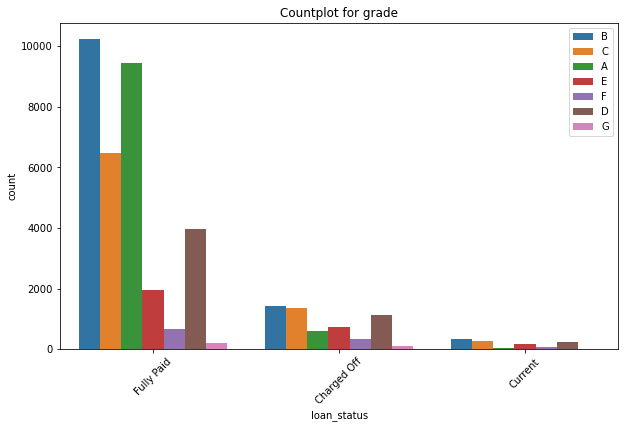

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


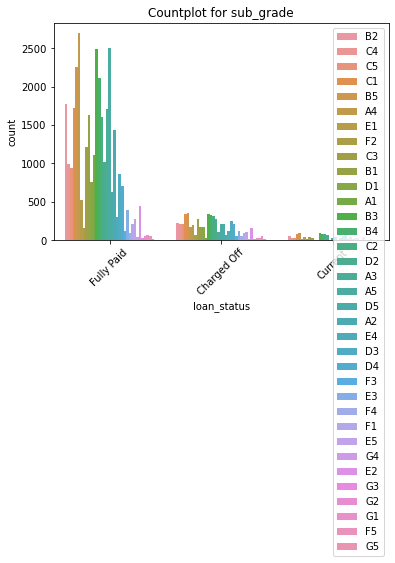

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


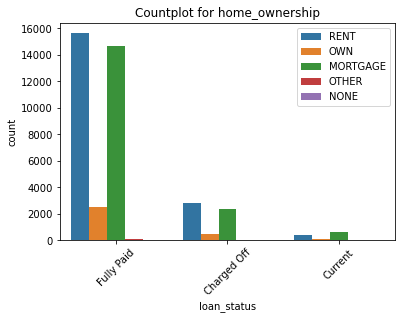

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


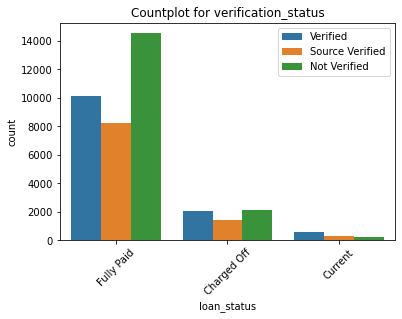

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


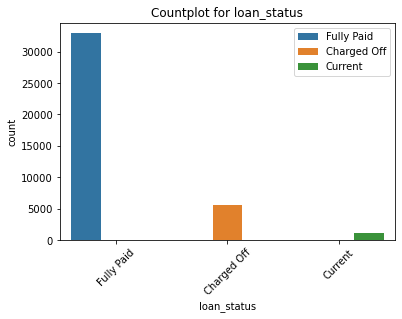

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


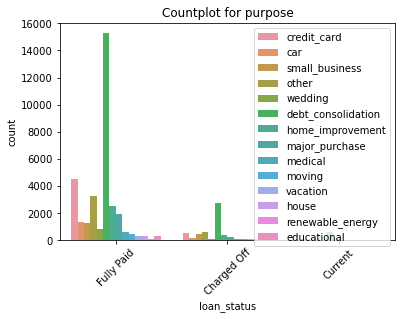

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


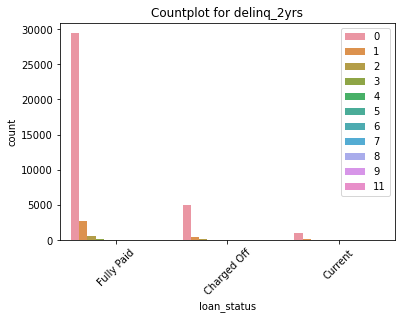

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


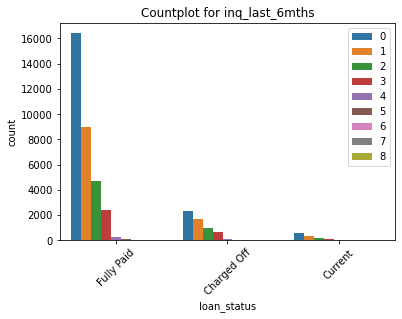

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


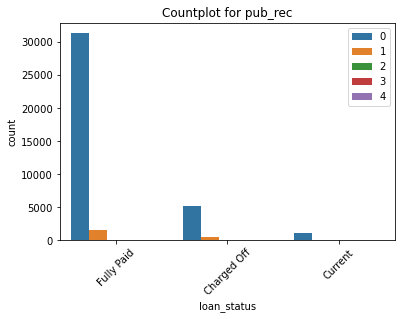

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


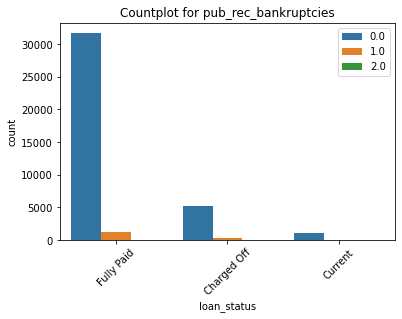

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


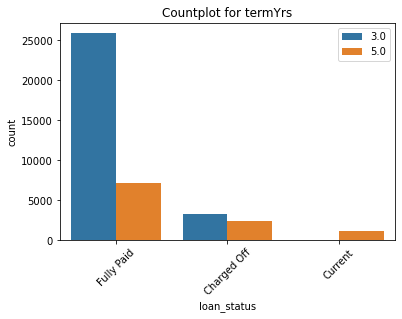

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


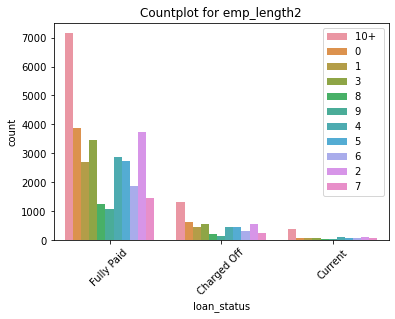

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


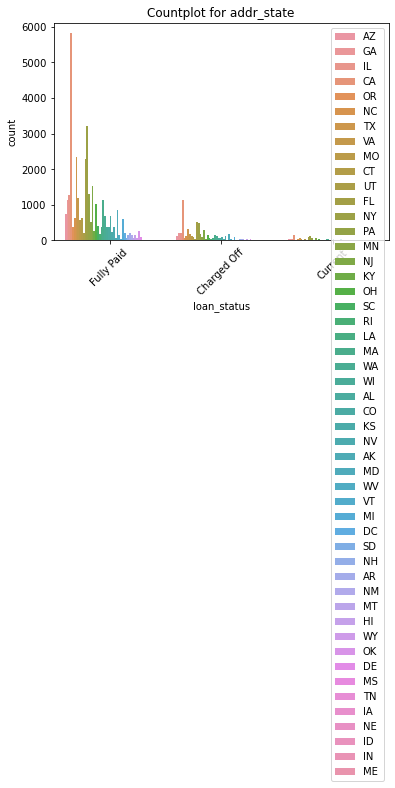

In [224]:
plt.figure(figsize=(10,6))
for col in cat_cols:
    sns.countplot(df.loan_status,hue=df[col])
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.legend(loc ="upper right")
    plt.show()

## Comments on countplot:
* pub_rec, pub_rec_bankruptcies, delinq_2yrs are not good indicators to decide on the loan_status. Majority of the values are near the mode()
* sub_grade doesn't seem to be a good indicator the way I have implemented. Some binning needs to be done. Put all the threes together, 2s together and 1s together? Or just look at grade and ignore sub_grade?


In [225]:
len(cont_cols)

27

In [226]:
"""plt.figure(figsize=(10,6))
for col in cont_cols:
    sns.histplot(df[col])
    plt.title(f"HistPlot for {col}")
    #plt.setp(title_obj, color='g')
    plt.xticks(rotation=45)
    plt.legend(loc ="upper right")
    plt.show()
"""

'plt.figure(figsize=(10,6))\nfor col in cont_cols:\n    sns.histplot(df[col])\n    plt.title(f"HistPlot for {col}")\n    #plt.setp(title_obj, color=\'g\')\n    plt.xticks(rotation=45)\n    plt.legend(loc ="upper right")\n    plt.show()\n'

In [227]:
df_numeric = df.select_dtypes(include=np.number)

In [228]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   int_rate              39717 non-null  float64
 4   installment           39717 non-null  float64
 5   annual_inc            39717 non-null  float64
 6   dti                   39717 non-null  float64
 7   delinq_2yrs           39717 non-null  int64  
 8   inq_last_6mths        39717 non-null  int64  
 9   open_acc              39717 non-null  int64  
 10  pub_rec               39717 non-null  int64  
 11  revol_bal             39717 non-null  int64  
 12  revol_util            39717 non-null  float64
 13  total_acc             39717 non-null  int64  
 14  out_prncp             39717 non-null  float64
 15  out_prncp_inv      

In [229]:
from IPython.display import Image

In [230]:
#sns_plot = sns.pairplot(df_numeric.sample(df_numeric.shape[0]//5), diag_kind='kde',
#                       plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
#                       height=4)
#sns_plot.savefig("pairplot.png")
#plt.clf()

In [231]:
df_numeric.shape

(39717, 25)

In [232]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: Int64

In [233]:
#Image(filename="pairplot.png")

## Correlation Matrix

In [234]:
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

<AxesSubplot:>

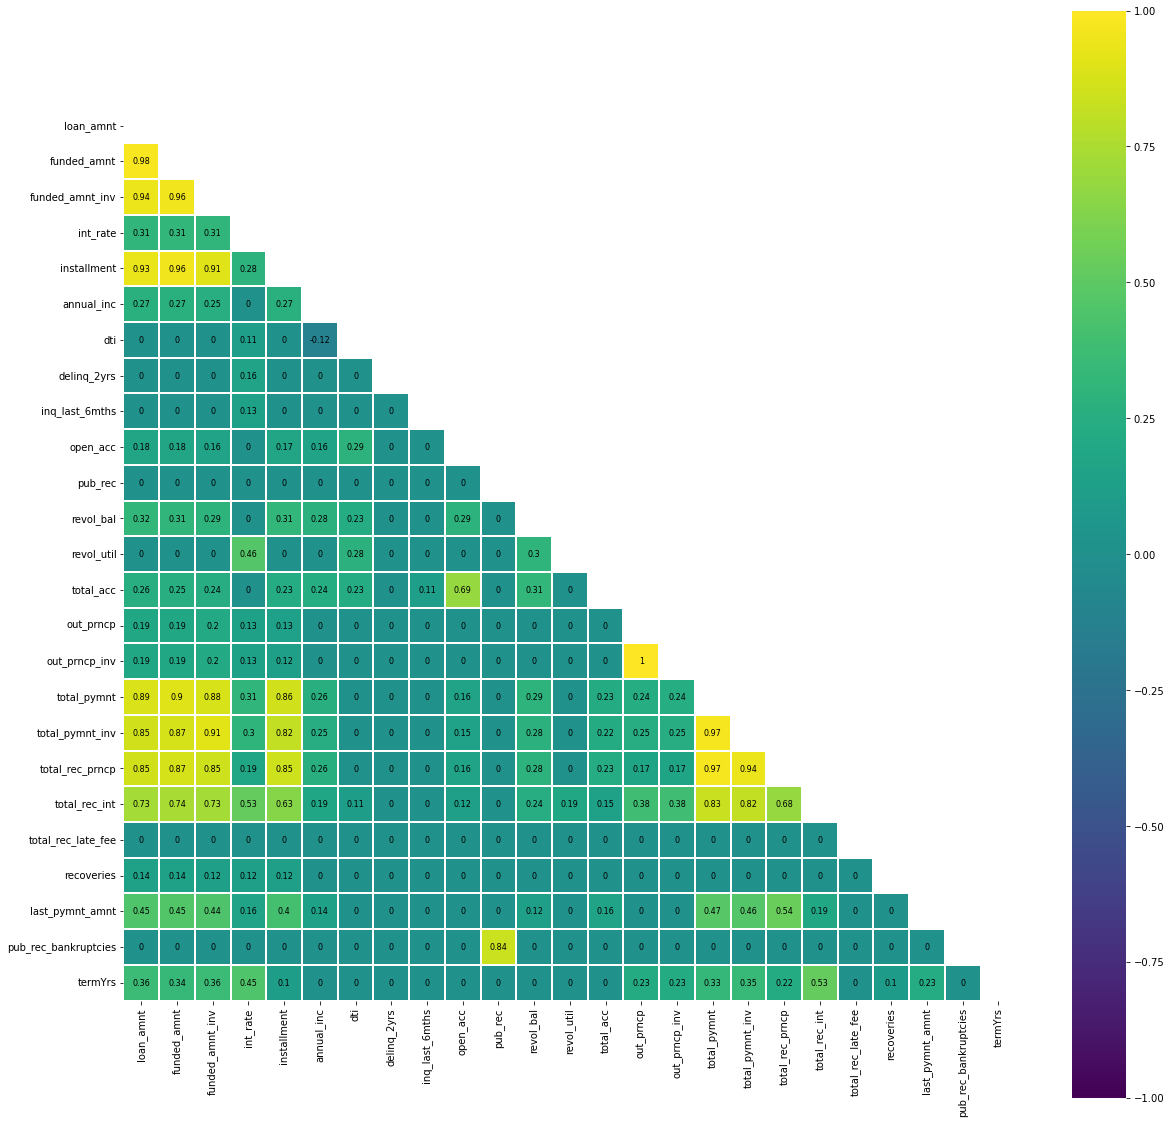

In [235]:
corr = df_numeric.corr()

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Choose the color map
cmap = "viridis"

corr[(corr < 0.1) & (corr > -0.1)] = 0
# plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 8, "color": "black"}, square=True, cmap=cmap, annot=True)

##### Strengh of relationship

* |r| < 0.3 $\Rightarrow$ None or Very Weak
* 0.3 < |r| < 0.5 $\Rightarrow$ Weak
* 0.5 < |r| < 0.7 $\Rightarrow$ Moderate
* |r| > 0.7 $\Rightarrow$ Strong

Correlation around 0.7 or above suggest a strong relationship and only one of the two variables is needed in the analysis. This need to be dealt with when adressing the features selection. 

Thus, we will look at two kinds of correlation: Those between the variable of interest and the predictors and those  within independent variables.

In [236]:
strongly_correlated_features = corr[abs(corr) >= 0.7]

In [237]:
strongly_correlated_features

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,termYrs
loan_amnt,1.00,0.98,0.94,NaN,0.93,NaN,NaN,NaN,NaN,NaN,...,NaN,0.89,0.85,0.85,0.73,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.98,1.00,0.96,NaN,0.96,NaN,NaN,NaN,NaN,NaN,...,NaN,0.90,0.87,0.87,0.74,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.94,0.96,1.00,NaN,0.91,NaN,NaN,NaN,NaN,NaN,...,NaN,0.88,0.91,0.85,0.73,NaN,NaN,NaN,NaN,NaN
int_rate,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,0.93,0.96,0.91,NaN,1.00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.86,0.82,0.85,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delinq_2yrs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inq_last_6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_acc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Strongly correlated features

* "funded_amnt" and "funded_amnt_inv"
* "loan_amnt" and "funded_amnt"
* "installment" and "loan_amnt"
* "total_acc" and "open_acc"
* "total_pymnt" and "loan_amnt"
* "total_pymnt" and "total_pymnt_inv"
* "total_rec_prncp" and "total_pymnt"
* "total_rec_int" and "loan_amnt" (0.73ish) 
* But "total_rec_int" and "installment" is 0.63
* "total_rec_int" and "total_pymnt"
* "pub_rec_bankruptcies" and "pub_rec"

In [238]:
# Strongly correlated features
# Decision b/w: loan_amnt, funded_amnt, funded_amnt_inv, installment = keep loan_amnt
# Decision b/w: total_acc and open_acc = keep total_acc
# Decision b/w: total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int and loan amnt. = Keep loan_amnt 
# Decision b/wL pub_rec_bankruptcies and pub_rec: Keep pub_rec_bankruptcies
XSC = ["funded_amnt_inv", "funded_amnt", "installment", "open_acc", 
       "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_amnt", "pub_rec"]
# These columns can be dropped later on

In [239]:
df.pub_rec_bankruptcies.value_counts()

0.00    38036
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

## Outlier Detection
1. Box Plots<br>
2. Mahalanobis Distance

When describing relationship between two variables, correlations is necessary, but not sufficient. More plots will help

In [240]:
# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from matplotlib import patches

In [241]:
df_bak = df

ValueError: num must be 1 <= num <= 18, not 19

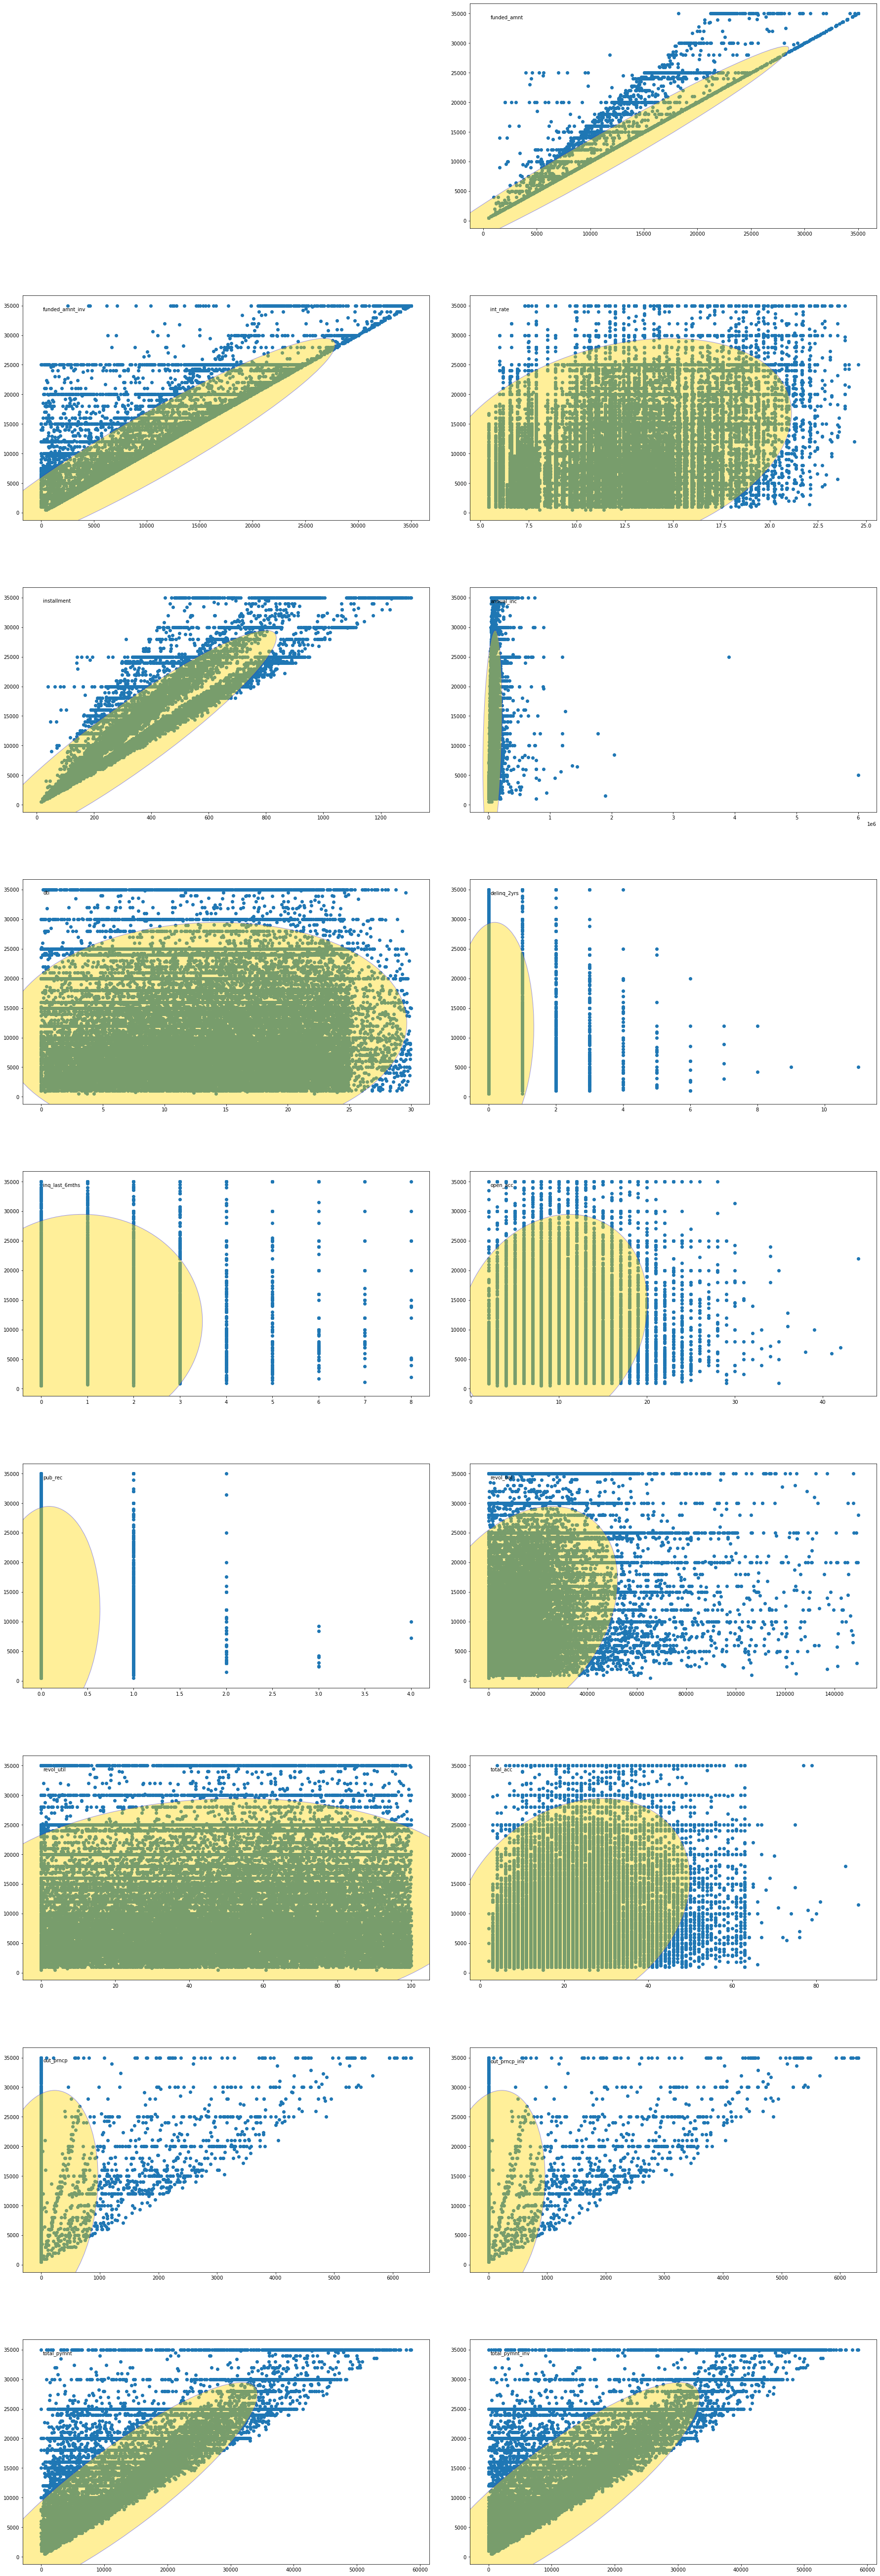

In [242]:
fig = plt.figure(figsize=(30,40))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.1,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
    if col != "loan_amnt":
        df = df_numeric[[col, 'loan_amnt']]
        df = df.dropna()
        df = df.to_numpy()

        # Covariance matrix
        covariance  = np.cov(df , rowvar=False)

        # Covariance matrix power of -1
        covariance_pm1 = np.linalg.matrix_power(covariance, -1)

        # Center point
        centerpoint = np.mean(df , axis=0)

        # Distances between center point and 
        distances = []
        for j, val in enumerate(df):
                p1 = val
                p2 = centerpoint
                distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
                distances.append(distance)
        distances = np.array(distances)

        # Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
        cutoff = chi2.ppf(0.95, df.shape[1])

        # Index of outliers
        outlierIndexes = np.where(distances > cutoff )

        #print('--- Index of Outliers ----')
        #print(outlierIndexes)

        #print('--- Observations found as outlier -----')
        #print(df[ distances > cutoff , :])

        ## Finding ellipse dimensions 
        pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        lambda_, v = np.linalg.eig(covariance)
        lambda_ = np.sqrt(lambda_)

        # Ellipse patch   
        ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                      width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                      angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='blue')
        ellipse.set_facecolor('gold')
        ellipse.set_alpha(0.4)
        ax = plt.subplot(9, 2, i+1)
        ax.add_artist(ellipse)
        #ellipse.set_hatch('+')
        plt.scatter(df[: , 0], df[ : , 1])
        ax.text(.05, .95, col , transform=ax.transAxes, ha="left", va="top")

In [243]:
df = df_bak

In [245]:
df_cat = df[cat_cols]

In [246]:
len(df_cat.columns)

13

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


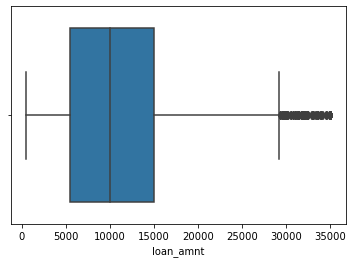

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


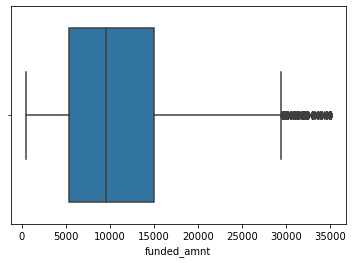

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


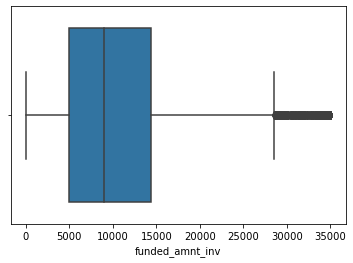

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


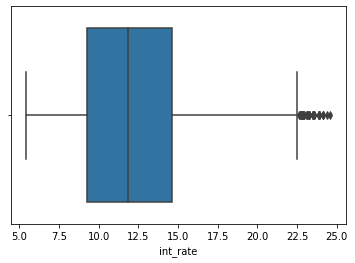

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


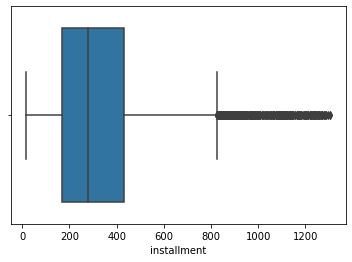

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


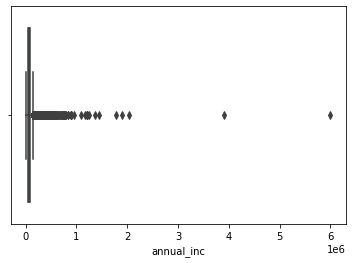

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


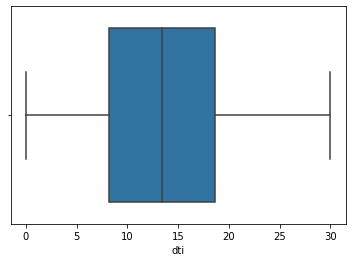

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


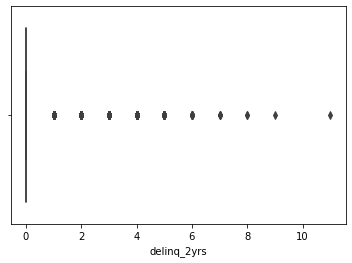

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


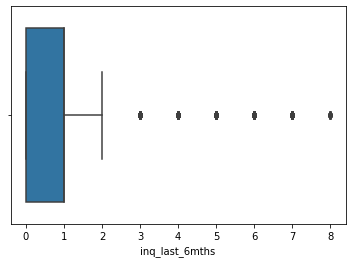

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


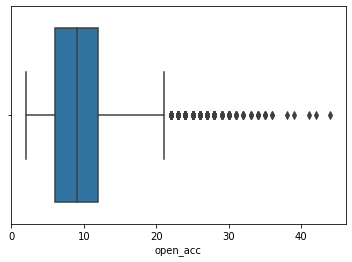

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


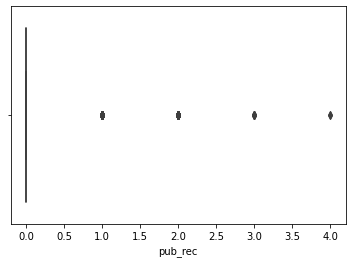

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


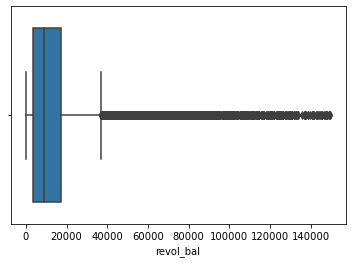

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


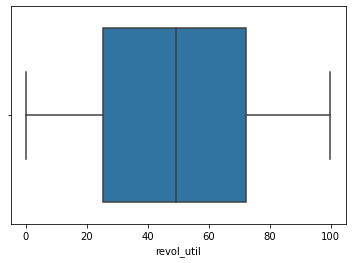

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


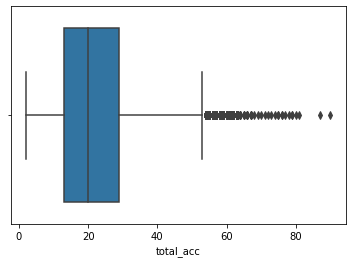

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


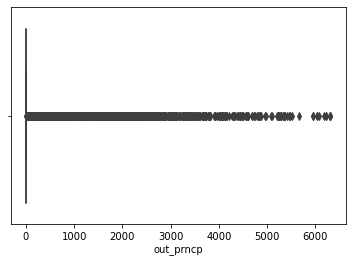

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


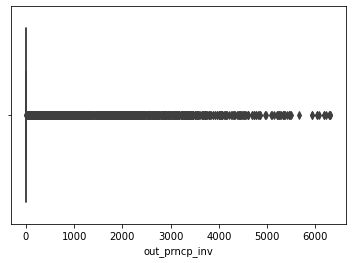

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


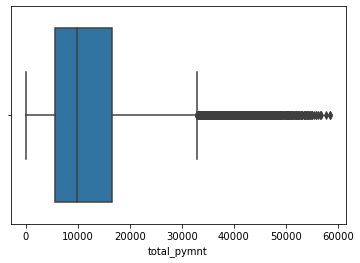

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


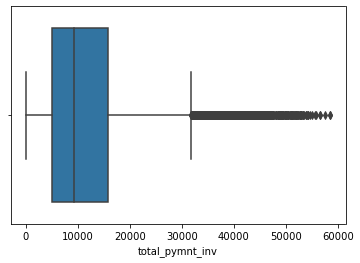

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


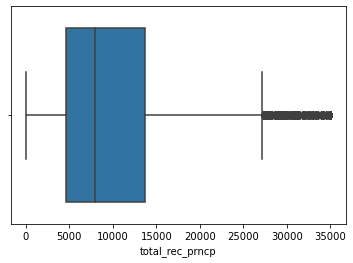

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


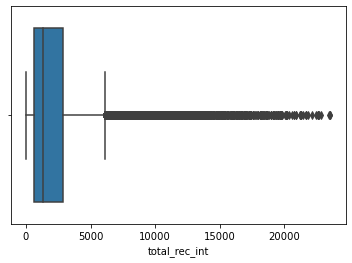

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


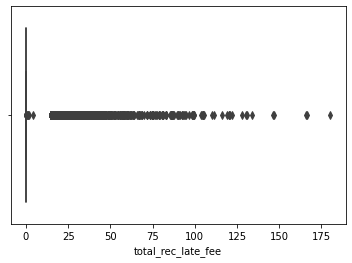

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


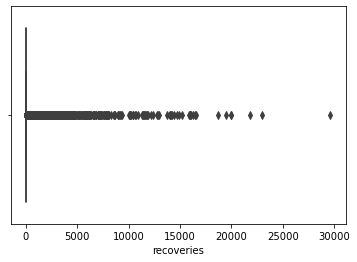

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


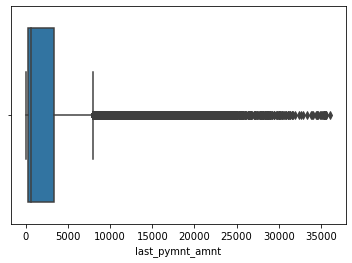

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


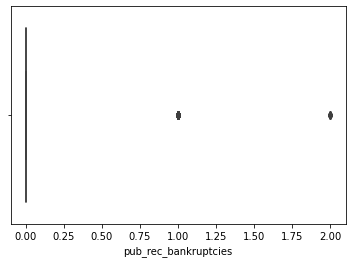

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


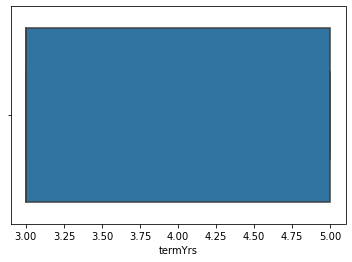

In [271]:
#fig, axes = plt.subplots(7,2,figsize=(20,30))
for col in df_numeric.columns:
    sns.boxplot(df[col], hue= df["loan_status"])
    plt.show()
    

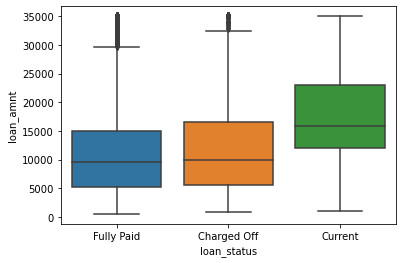

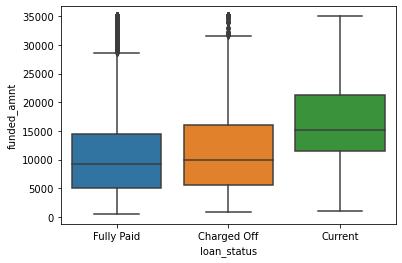

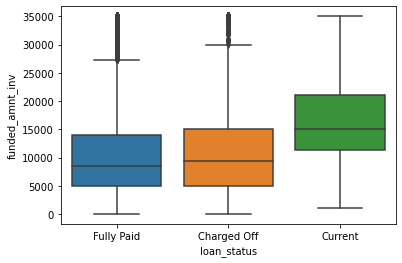

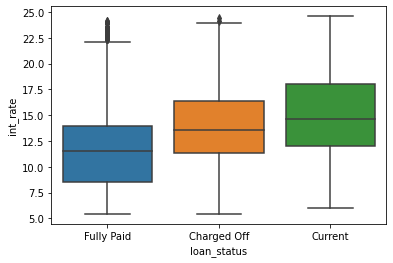

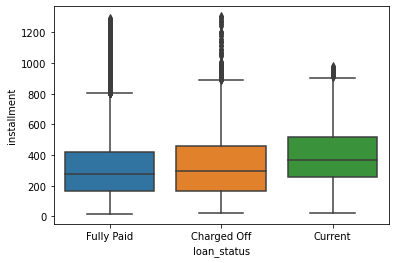

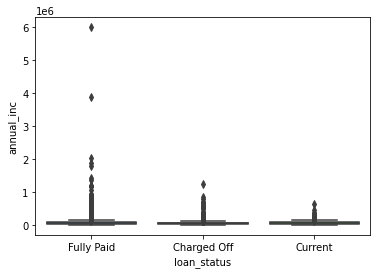

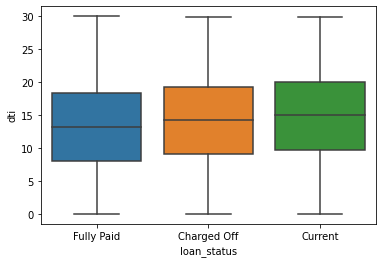

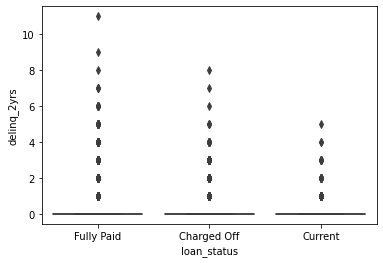

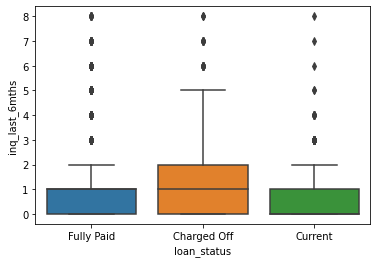

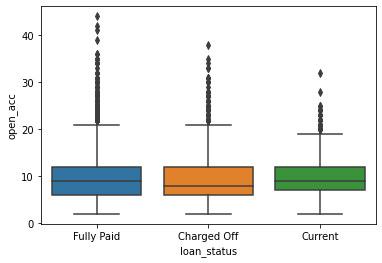

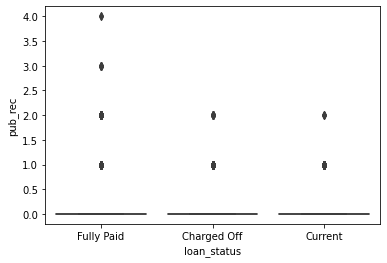

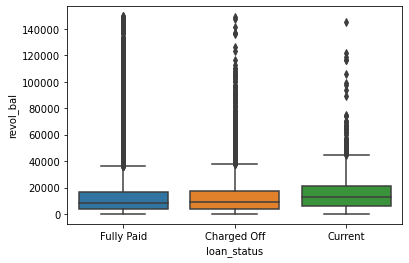

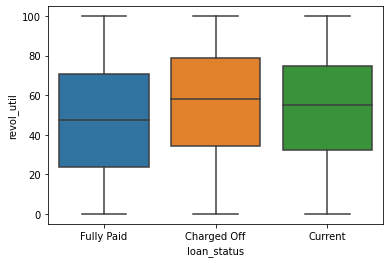

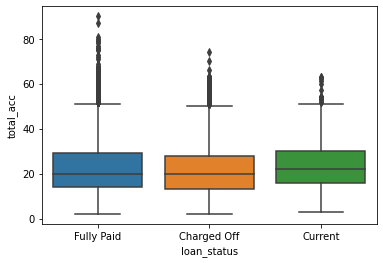

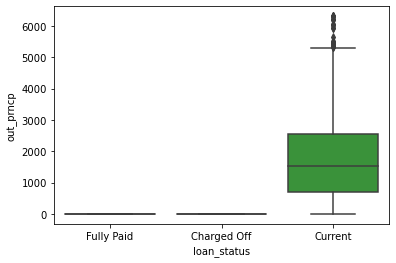

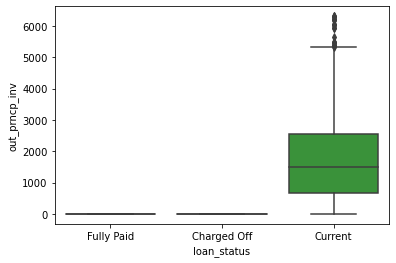

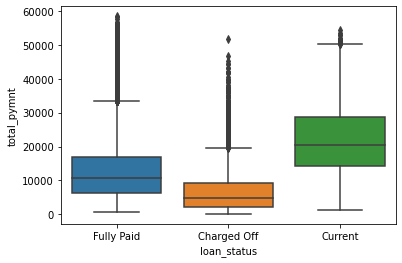

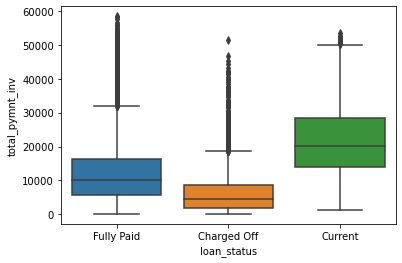

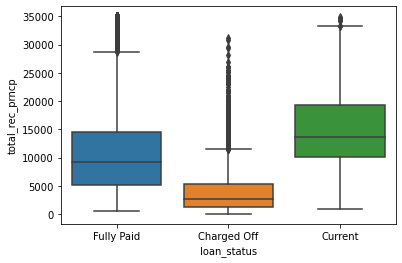

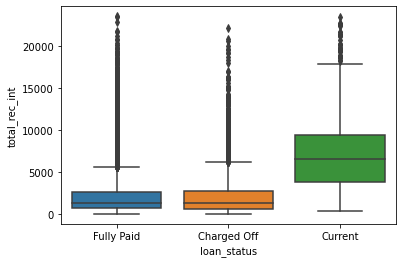

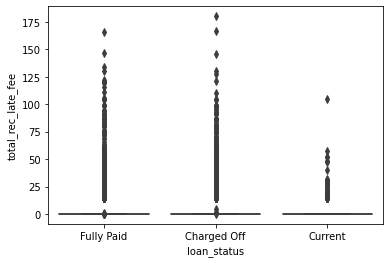

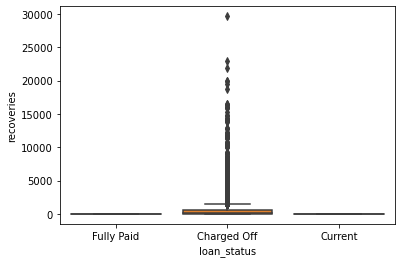

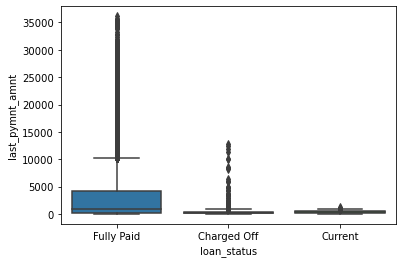

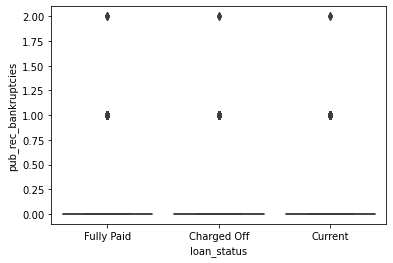

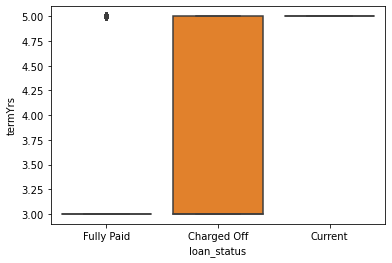

In [298]:
#fig, axes = plt.subplots(7,2,figsize=(20,30))
for col in df_numeric.columns:
    sns.boxplot(y=df[col], x= df["loan_status"])
    plt.show()

## Comments
* When we look at the boxplots, we see a similar observation that we obtained from correlation matrix(heatmap)
* total_pymnt and total_pymnt_inv have similar distribution. Seem to be highy correlated
* total_acc and open_acc, funded_amnt, funded_amnt_inv
* and so on.. 
We can drop highly correlated features and keep only one, as they do not add much information with regards to the target variable

In [273]:
df.funded_amnt

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 39717, dtype: int64

In [274]:
df.funded_amnt_inv

0        4,975.00
1        2,500.00
2        2,400.00
3       10,000.00
4        3,000.00
           ...   
39712    1,075.00
39713      875.00
39714    1,325.00
39715      650.00
39716      800.00
Name: funded_amnt_inv, Length: 39717, dtype: float64

In [276]:
((df.loan_amnt == df.funded_amnt) == True).sum()

37868

In [277]:
df.shape

(39717, 40)

In [279]:
(39717-37868)/39717

0.046554372183196115

In [280]:
df_check = pd.read_csv("loan.csv", dtype={"next_pymnt_d": "string"})

In [284]:
df_check.verification_status.value_counts()

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [291]:
df_object = df_check.select_dtypes(include="object")

In [292]:
df_string = df_check.select_dtypes(include="string")

In [295]:
df_check["verification_status_joint"].isna().sum()

39717

In [297]:
df_check.next_pymnt_d.isna().sum()

38577

### Some segmented analysis and bivariate analysis
* Some groupby and pivot tables needed

In [299]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   int_rate              39717 non-null  float64
 4   installment           39717 non-null  float64
 5   annual_inc            39717 non-null  float64
 6   dti                   39717 non-null  float64
 7   delinq_2yrs           39717 non-null  int64  
 8   inq_last_6mths        39717 non-null  int64  
 9   open_acc              39717 non-null  int64  
 10  pub_rec               39717 non-null  int64  
 11  revol_bal             39717 non-null  int64  
 12  revol_util            39717 non-null  float64
 13  total_acc             39717 non-null  int64  
 14  out_prncp             39717 non-null  float64
 15  out_prncp_inv      

### Seeing how the table looks like when we group by loan status with aggfunc=mean

In [461]:
df_bak.groupby(by="loan_status").median()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,termYrs
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,"10,000.00","10,000.00","9,401.21",13.61,293.87,"53,000.00",14.29,0.00,1.00,8.00,...,0.00,"4,839.00","4,345.74","2,729.59","1,288.26",0.00,173.04,238.25,0.00,3.00
Current,"15,825.00","15,225.00","15,000.00",14.65,368.19,"65,000.00",15.05,0.00,0.00,9.00,...,"1,500.78","20,370.96","20,052.04","13,652.83","6,564.60",0.00,0.00,369.56,0.00,5.00
Fully Paid,"9,600.00","9,200.00","8,500.00",11.49,275.65,"60,000.00",13.20,0.00,1.00,9.00,...,0.00,"10,687.16","9,993.37","9,200.00","1,301.53",0.00,0.00,863.68,0.00,3.00


#### I. Charged Off:
1. Cannot comment much on the funded_amnt. There doesn't seem to be a pattern. It roughly hovers around 10k.
2. int_rate is second highest. But not sure if we can obtain anything beyond that.
3. The annual income is coming out to be the lowest among the three loan_status' categories. But not by much. 
4. The total_pymnt column understandably has lowest among the categories indicating that the borrower has not been making enough payments. This will observed for all the "totalxx" columns, since they are highly correlated as we saw earlier.
5. recoveries: This is applicable to only charged off borrowers. Hence we see non-zero number under charged off cat, and zeros in the other categories. 
6. last_pymnt_amnt: Is the lowest for this category. 
7. Also the median termYrs is 3.

#### II. Current:
1. The following params are the highest among the three:
- funded_amnt, int_rate, installment, annual_inc
- dti: This will be high here since it is the ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
2. The outstanding principal for portion of total amount funded by investors is non-zero only for this category.
3. "total" columns are the highest again
4. The last payment amount is not that high. Right in the center
5. Annual inc: higest of the three. Makes sense since high salaried persons can afford a loan

#### III. Charged Off:
1. last_pymnt_amount highest among the three
2. total columns right in the center of the three cats
3. Annual inc: second highest
4. funded_amnt: Lowest
5. int_rate: lowest

In [304]:
cat_cols

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies',
 'termYrs',
 'emp_length2',
 'addr_state']

### Some pivot tables.
> looking at grade wise pivots. values will still be funded_amount

In [ ]:
df_bak.pivot_table(index="grade",columns=["loan_status"], values="funded_amnt", aggfunc="median")

### It is evident from the table below that worse the credit rating of a person, more money they will borrow. 
* Grade G's borrowed amount ~18-20k.
* Grade A's borrowed amount ~ 7.5k to 10k.
- May be people with credit ratings live a more risky life? : )

In [306]:
df_bak.pivot_table(index="grade",columns=["loan_status"], values="funded_amnt", aggfunc="mean")

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,"7,625.66","10,174.38","8,444.44"
B,"10,564.42","16,742.03","10,704.68"
C,"10,763.21","16,239.49","10,560.38"
D,"11,914.65","15,119.03","11,942.87"
E,"15,270.10","17,424.16","15,049.15"
F,"18,520.53","20,794.86","16,939.23"
G,"18,283.42","19,419.12","20,652.02"


### Let's get some numbers
1. How many people of a certain grade borrowed
2. How many of them defaulted, how many are currently paying/have fully paid

In [464]:
df_chargedOff = df_bak[df_bak["loan_status"] == "Charged Off"].groupby(by="grade").size()

In [465]:
df_chargedOff

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
dtype: int64

In [499]:
total_charged_off = []
for i in range(df_chargedOff.shape[0]):
    total_charged_off.append(df_chargedOff[i])

In [500]:
total_charged_off

[602, 1425, 1347, 1118, 715, 319, 101]

In [466]:
df_current = df_bak[df_bak["loan_status"] == "Current"].groupby(by="grade").size()

In [467]:
df_current

grade
A     40
B    345
C    264
D    222
E    179
F     73
G     17
dtype: int64

In [501]:
total_current = []
for i in range(df_current.shape[0]):
    total_current.append(df_current[i])

In [468]:
df_fullyPaid = df_bak[df_bak["loan_status"] == "Fully Paid"].groupby(by="grade").size()

In [469]:
df_fullyPaid

grade
A     9443
B    10250
C     6487
D     3967
E     1948
F      657
G      198
dtype: int64

In [502]:
total_fullyPaid = []
for i in range(df_fullyPaid.shape[0]):
    total_fullyPaid.append(df_fullyPaid[i])

In [478]:
df_totalPeopleGradeWise = df_bak.groupby(by="grade").size()

In [479]:
df_totalPeopleGradeWise

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
dtype: int64

In [503]:
total_totalGradeWise = []
for i in range(df_totalPeopleGradeWise.shape[0]):
    total_totalGradeWise.append(df_totalPeopleGradeWise[i])

## Pie chart please : )

In [474]:
l = [1,2,3]
m = [4,5,6]
n=[7,8,9]
r = {}
label = ["a","b","c"]
count = 0
for i,j,k in zip(l,m,n):
    r[label[count]] = round([i,j,k]/
    count += 1

In [475]:
r

{'a': [1, 4, 7], 'b': [2, 5, 8], 'c': [3, 6, 9]}

In [511]:
gradewise_dist ={}
grade_labels = sorted(df.grade.unique())
cnt = 0
for ch,cur,fPaid,totalGWise in zip(total_charged_off,total_current, total_fullyPaid, total_totalGradeWise):
    gradewise_dist[grade_labels[cnt]] = [round(100 *ch/totalGWise,2), round(100 *cur/totalGWise,2), round(100 *fPaid/totalGWise,2)]
    cnt += 1

In [512]:
grade_labels

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [513]:
gradewise_dist

{'A': [5.97, 0.4, 93.63],
 'B': [11.86, 2.87, 85.27],
 'C': [16.63, 3.26, 80.11],
 'D': [21.07, 4.18, 74.75],
 'E': [25.16, 6.3, 68.54],
 'F': [30.41, 6.96, 62.63],
 'G': [31.96, 5.38, 62.66]}

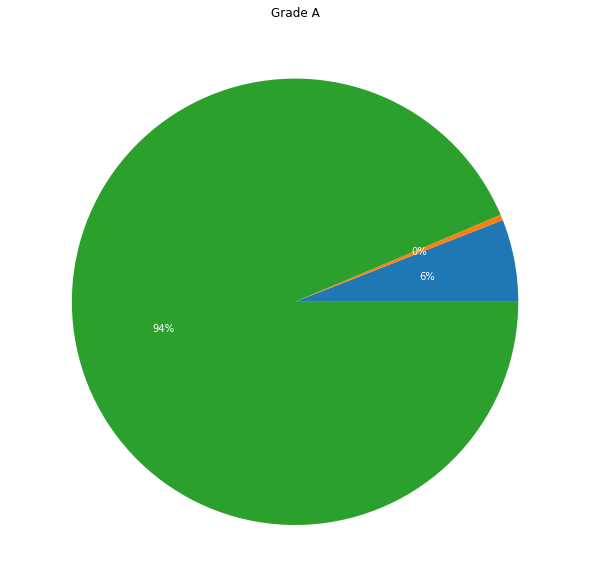

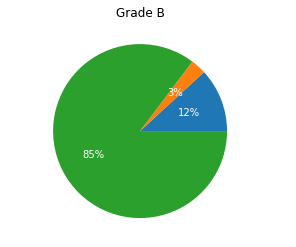

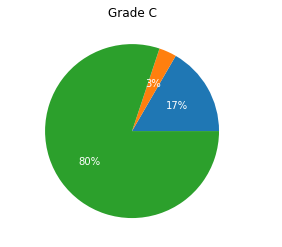

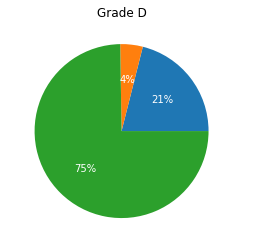

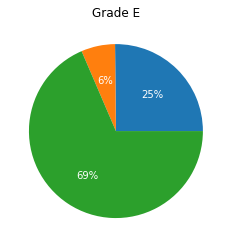

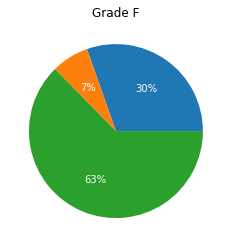

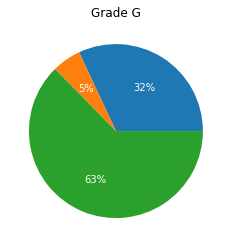

In [514]:
plt.figure(figsize=(10,15))
for label in grade_labels:
    plt.pie(gradewise_dist[label],labels=["Charged Off", "Current", "Fully Paid"], autopct='%.0f%%', textprops={'color':"w"})
    plt.title(f"Grade {label}")
    plt.show()


In [517]:
df_chargedOff

grade
A     602
B    1425
C    1347
D    1118
E     715
F     319
G     101
dtype: int64

### Analyzing charged off borrowers alone. 
1. Looking at this, it seems B,C D are more likely to default, it goes against our 
2. But this can be deceptive. We must see people default/people who borrowed money (but gradewise)


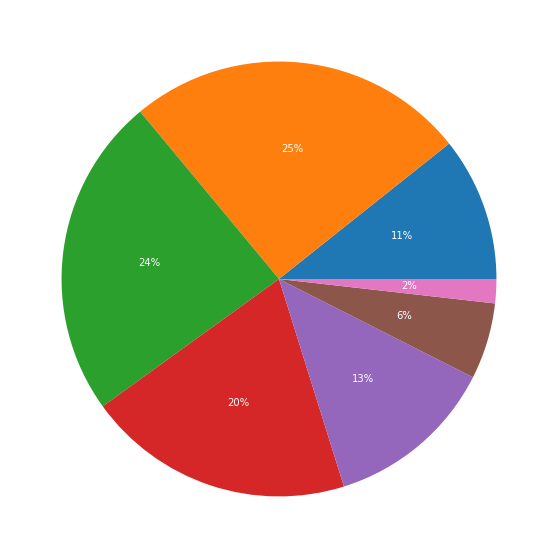

In [519]:
plt.figure(figsize=(10,10))
plt.pie(df_chargedOff,labels=grade_labels,autopct='%.0f%%', textprops={'color':"w"})
plt.show()

In [307]:
df_bak.pivot_table(index="home_ownership",columns=["loan_status"], values="funded_amnt", aggfunc="mean")

loan_status,Charged Off,Current,Fully Paid
home_ownership,,,
MORTGAGE,"13,587.24","17,878.06","11,880.18"
NONE,NaN,NaN,"5,600.00"
OTHER,"13,326.39",NaN,"9,433.75"
OWN,"10,761.46","14,346.39","9,783.97"
RENT,"10,395.10","14,789.38","9,575.37"


In [312]:
df_bak.pivot_table(index=["home_ownership", "emp_length2"],columns=["loan_status"], values="funded_amnt", aggfunc="mean")

loan_status                 Charged Off   Current  Fully Paid
home_ownership emp_length2                                   
MORTGAGE       0              12,227.82 16,773.08   11,129.38
               1              12,106.75 18,958.33   11,628.91
               10+            14,805.74 19,366.51   12,558.64
               2              13,402.44 16,380.62   11,432.01
               3              12,943.44 16,735.71   11,729.29
               4              13,809.80 16,136.63   11,778.40
               5              13,191.75 18,152.04   11,731.28
               6              13,640.46 15,646.53   11,726.97
               7              14,309.83 15,921.32   11,605.35
               8              12,315.20 18,545.65   12,012.00
               9              13,831.01 16,372.83   11,961.92
NONE           0                    NaN       NaN    3,400.00
               5                    NaN       NaN   10,000.00
OTHER          0               4,087.50       NaN    8,793.42
               1              17,000.00       NaN   11,381.82
               10+            16,770.00       NaN    8,205.36
               2              11,737.50       NaN   11,421.88
               3              10,858.33       NaN    9,571.43
               4                    NaN       NaN    8,057.14
               5               7,800.00       NaN    9,937.50
               6                    NaN       NaN    8,381.25
               7              16,000.00       NaN    7,000.00
               8                    NaN       NaN   11,375.00
OWN            0               8,796.15  6,175.00    8,527.52
               1               9,739.29  3,700.00    8,477.82
               10+            14,428.03 18,960.42   11,550.20
               2               8,948.84 10,781.25    9,356.78
               3               9,679.61 11,717.86    8,955.17
               4              11,797.32 20,075.00    8,942.03
               5              11,345.83 14,307.14    9,475.53
               6              10,846.30 16,750.00   10,143.51
               7               8,163.64 17,312.50    9,989.04
               8              12,175.00  9,175.00   10,975.00
               9              12,471.43  5,000.00   11,034.74
RENT           0               9,197.55 12,777.34    8,495.07
               1               9,267.86 12,776.35    8,999.59
               10+            13,068.78 16,357.11   11,412.44
               2               9,088.72 15,432.08    8,980.82
               3               9,998.16 13,911.59    9,369.13
               4               9,526.36 14,356.55    9,714.72
               5              10,674.55 15,747.66    9,966.54
               6              11,233.89 14,444.32   10,034.52
               7              11,530.08 16,111.46   10,764.40
               8              12,947.73 13,620.59   10,282.25
               9              11,410.38 13,346.88   10,885.23

In [314]:
df.inq_last_6mths.value_counts()

0    19300
1    10971
2     5812
3     3048
4      326
5      146
6       64
7       35
8       15
Name: inq_last_6mths, dtype: int64

In [340]:
pd.set_option('display.max_rows', 1000)

In [341]:
df_bak.pivot_table(index=["addr_state", "zip_code"],columns=["loan_status"], values="funded_amnt", aggfunc="median")

loan_status          Charged Off   Current  Fully Paid
addr_state zip_code                                   
AK         352xx       20,000.00       NaN         NaN
           363xx             NaN       NaN   20,000.00
           995xx        6,000.00       NaN   13,500.00
           996xx       14,500.00 35,000.00    5,900.00
           997xx       18,750.00 23,000.00   12,000.00
           998xx             NaN       NaN    8,225.00
           999xx        7,650.00       NaN         NaN
AL         350xx        7,000.00 12,500.00    9,600.00
           351xx        7,600.00       NaN    8,000.00
           352xx        5,000.00 25,975.00    9,000.00
           353xx             NaN       NaN   10,750.00
           354xx       16,000.00 12,000.00   10,000.00
           355xx       15,425.00       NaN    8,800.00
           356xx        7,500.00 15,000.00    8,850.00
           357xx        4,000.00 15,000.00    9,587.50
           358xx        7,000.00 27,000.00    5,875.00
           359xx        9,750.00 15,000.00    7,000.00
           360xx        6,000.00       NaN    8,000.00
           361xx       12,000.00 35,000.00   10,500.00
           362xx       12,000.00 18,000.00   14,000.00
           363xx       22,000.00 13,500.00    8,750.00
           364xx       16,450.00       NaN    4,750.00
           365xx       12,275.00 13,500.00    9,100.00
           366xx        7,000.00 31,750.00   10,000.00
           367xx        4,200.00       NaN    8,000.00
           368xx       20,000.00 20,000.00   11,000.00
           369xx             NaN       NaN    1,200.00
AR         711xx        2,000.00       NaN         NaN
           716xx       18,800.00 29,175.00    6,000.00
           717xx        9,375.00       NaN    5,100.00
           718xx        1,000.00       NaN    5,400.00
           719xx        4,750.00       NaN   10,650.00
           720xx        7,000.00  7,200.00   10,000.00
           721xx        5,000.00 25,000.00   10,300.00
           722xx       16,300.00       NaN    7,000.00
           723xx             NaN       NaN   12,000.00
           724xx       12,300.00 13,700.00   11,000.00
           725xx        8,487.50 16,550.00    8,000.00
           726xx             NaN       NaN    6,000.00
           727xx        5,000.00 25,000.00   11,000.00
           728xx             NaN 16,200.00    8,000.00
           729xx       18,000.00       NaN    9,500.00
           857xx             NaN       NaN    4,500.00
           864xx             NaN       NaN    1,200.00
AZ         727xx        2,500.00       NaN         NaN
           850xx        7,650.00  7,900.00    7,875.00
           851xx        8,250.00 18,225.00   12,250.00
           852xx       12,125.00 16,450.00    9,050.00
           853xx       11,000.00 24,175.00    9,000.00
           855xx             NaN 10,000.00    6,400.00
           856xx       11,000.00       NaN    9,900.00
           857xx        8,000.00 24,550.00    8,800.00
           859xx        7,800.00       NaN   12,500.00
           860xx        9,000.00 14,300.00    6,000.00
           863xx       11,862.50 25,000.00    8,000.00
           864xx       16,000.00 27,500.00    6,500.00
           865xx             NaN       NaN    9,900.00
           925xx             NaN       NaN    3,600.00
CA         554xx             NaN       NaN   24,000.00
           827xx             NaN       NaN   15,000.00
           900xx       10,000.00 23,675.00    9,000.00
           902xx        9,037.50 10,000.00    9,350.00
           903xx       18,000.00       NaN    5,750.00
           904xx       15,662.50       NaN   10,000.00
           905xx       15,000.00       NaN   10,000.00
           906xx        9,625.00  9,000.00    9,600.00
           907xx        9,000.00 20,000.00    8,000.00
           908xx        8,875.00       NaN   10,000.00
           910xx        9,525.00 25,000.00    8,000.00
           911xx       21,100.00 21,200.00   10,575.00
           912xx       14,500.00 12,000.

In [346]:
(df[df.emp_title == "US Army"]["addr_state"]).value_counts()

TX    21
GA    16
VA    13
WA    12
NY     8
MD     8
MO     6
CA     5
LA     5
NC     5
FL     4
CO     4
AL     3
MI     3
HI     3
AZ     3
MA     3
NJ     2
KS     2
NV     1
SC     1
AR     1
AK     1
UT     1
PA     1
DE     1
OK     1
Name: addr_state, dtype: Int64

In [338]:
df.zip_code.value_counts()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
479xx      1
772xx      1
414xx      1
044xx      1
469xx      1
Name: zip_code, Length: 823, dtype: Int64

In [347]:
df_bak

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,termYrs,emp_length2
0,5000,5000,"4,975.00",10.65,162.87,B,B2,NaN,RENT,"24,000.00",...,"5,000.00",863.16,0.00,0.00,Jan-15,171.62,May-16,0.00,3.00,10+
1,2500,2500,"2,500.00",15.27,59.83,C,C4,Ryder,RENT,"30,000.00",...,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.00,5.00,0
2,2400,2400,"2,400.00",15.96,84.33,C,C5,NaN,RENT,"12,252.00",...,"2,400.00",605.67,0.00,0.00,Jun-14,649.91,May-16,0.00,3.00,10+
3,10000,10000,"10,000.00",13.49,339.31,C,C1,AIR RESOURCES BOARD,RENT,"49,200.00",...,"10,000.00","2,214.92",16.97,0.00,Jan-15,357.48,Apr-16,0.00,3.00,10+
4,3000,3000,"3,000.00",12.69,67.79,B,B5,University Medical Group,RENT,"80,000.00",...,"2,475.94","1,037.39",0.00,0.00,May-16,67.79,May-16,0.00,5.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,"1,075.00",8.07,78.42,A,A4,FiSite Research,MORTGAGE,"110,000.00",...,"2,500.00",322.97,0.00,0.00,Jul-10,80.90,Jun-10,0.00,3.00,4
39713,8500,8500,875.00,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",RENT,"18,000.00",...,"8,500.00","1,413.49",0.00,0.00,Jul-10,281.94,Jul-10,0.00,3.00,3
39714,5000,5000,"1,325.00",8.07,156.84,A,A4,NaN,MORTGAGE,"100,000.00",...,"5,000.00",272.16,0.00,0.00,Apr-08,0.00,Jun-07,0.00,3.00,0
39715,5000,5000,650.00,7.43,155.38,A,A2,NaN,MORTGAGE,"200,000.00",...,"5,000.00",174.20,0.00,0.00,Jan-08,0.00,Jun-07,0.00,3.00,0


In [348]:
df_bak.pivot_table(index="purpose",columns=["loan_status"], values="funded_amnt", aggfunc="mean")

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,"7,202.66","7,700.50","6,619.12"
credit_card,"12,546.13","18,634.47","11,155.01"
debt_consolidation,"13,130.38","17,943.73","12,041.54"
educational,"7,508.48",NaN,"6,522.12"
home_improvement,"11,640.99","17,590.59","10,908.22"
house,"12,523.73","20,801.79","12,381.09"
major_purchase,"8,885.59","12,308.11","7,781.60"
medical,"8,568.40","15,431.25","7,864.74"
moving,"5,838.59","13,410.71","6,534.14"


In [352]:
df_chargedOff = df[df_bak.loan_status == "Charged Off"]

In [354]:
df_purpose = df_chargedOff.groupby(by="purpose").size()

In [370]:
label = df_bak["purpose"].unique()

In [380]:
label = sorted(label)

In [381]:
label

['car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding']

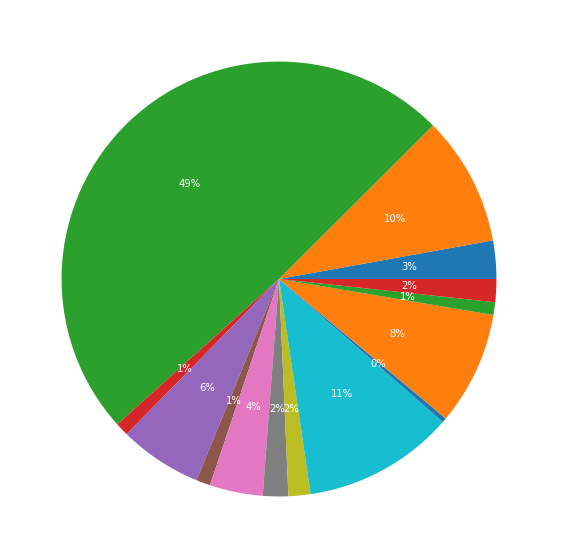

In [390]:
plt.figure(figsize=(10,10))
plt.pie(df_purpose,labels=label, autopct='%.0f%%', textprops={'color':"w"})
plt.show()

### Histogram

In [408]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: Int64

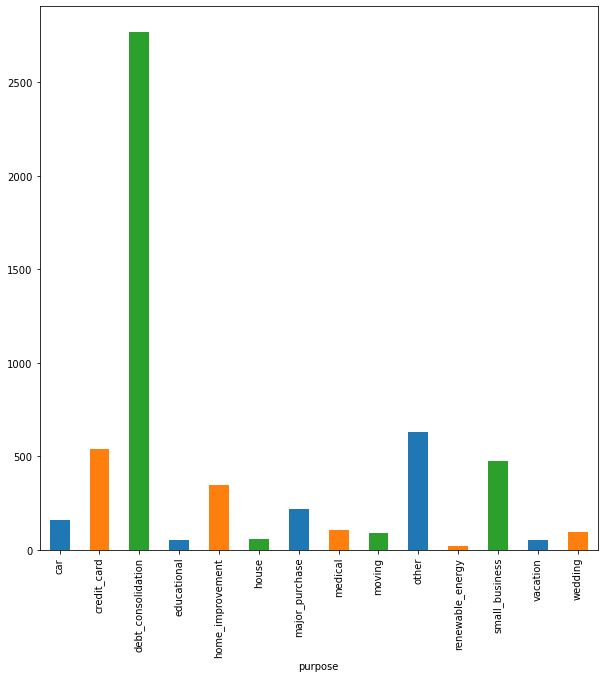

In [407]:
#plt.hist(df_purpose,label=label)
plt.figure(figsize=(10,10))
ax = df_purpose.plot(kind="bar",color=["C0","C1","C2"])
plt.show()

In [414]:
df.purpose.value_counts()

debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: purpose, dtype: Int64

In [422]:
df.purpose.value_counts().sort_index()

car                    1549
credit_card            5130
debt_consolidation    18641
educational             325
home_improvement       2976
house                   381
major_purchase         2187
medical                 693
moving                  583
other                  3993
renewable_energy        103
small_business         1828
vacation                381
wedding                 947
Name: purpose, dtype: Int64

In [430]:
total = []
for i in range(len(label)):
    total.append(df.purpose.value_counts().sort_index()[i])
    

In [427]:
total

[1549, 5130, 18641, 325, 2976, 381, 2187, 693, 583, 3993, 103, 1828, 381, 947]

In [431]:
chargedOff_total = []
for i in range(len(label)):
    chargedOff_total.append(df_purpose[i])

In [432]:
chargedOff_total

[160, 542, 2767, 56, 347, 59, 222, 106, 92, 633, 19, 475, 53, 96]

In [433]:
df_purpose

purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
dtype: int64

In [450]:
res = [round((i/j)*100,2) for i,j in zip(chargedOff_total, total)]

IndexError: list index out of range

In [456]:
res= {}
cnt = 0
for i,j in zip(chargedOff_total,total):
    res[label[cnt]] = round((i/j)*100,2)
    cnt += 1

In [457]:
res

{'car': 10.33,
 'credit_card': 10.57,
 'debt_consolidation': 14.84,
 'educational': 17.23,
 'home_improvement': 11.66,
 'house': 15.49,
 'major_purchase': 10.15,
 'medical': 15.3,
 'moving': 15.78,
 'other': 15.85,
 'renewable_energy': 18.45,
 'small_business': 25.98,
 'vacation': 13.91,
 'wedding': 10.14}

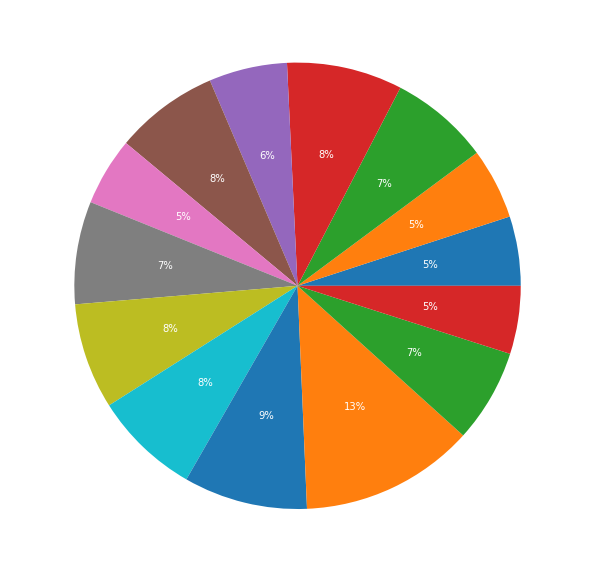

In [460]:
plt.figure(figsize=(10,15))
plt.pie(res.values(),labels=label, autopct='%.0f%%', textprops={"color": "w"})
plt.show()

In [521]:
df_test = pd.read_csv("loan.csv")

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [523]:
df_test.shape

(39717, 111)

In [527]:
df_test.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [525]:
df.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [524]:
2459/df_test.shape[0]

0.06191303472064859

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [532]:
np.median([4422,5935,152774,40319,15676])


15676.0

In [533]:
np.mean([4422,5935,152774,40319,15676, 0])

36521.0

In [534]:
np.median([4422,5935,152774,40319,15676, 0])

10805.5

In [535]:
5935+15676


21611

35835.5